**Devoir PHYS-F-302, année académique 2019-2020** 

Soit l'équation différentielle ordre 4 linéaire à coefficients constants:

$$
\begin{equation}
\frac{d^4 f}{dx^4}-5 \frac{d^2 f}{dx^2}+ 4f = 0
\end{equation}
$$

où $f$ est une fonction de la variable $x\in [0\ 1]$. Par ailleurs, on a les conditions aux bords suivantes:

$$
\begin{equation}
f(0)=a, f'(0)=b, f(1)=c, f'(1)=d 
\end{equation}
$$

La solution générale de cette équation se calcule comme ceci :
On calcule tout d'abord le déterminant de l'équation caractéristique.
L’équation caractéristique à résoudre est : 
$$
\begin{equation}
m^2 -5m +4 = 0 
\end{equation}
$$
où m = $f^2$
$$
\begin{equation}
f = 1, -1 , -\sqrt2 , \sqrt2 
\end{equation}
$$

Les racines de ce polynôme de degré 4 serviront à déterminer un ensemble fondamental de solutions, c’est à dire un ensemble de $n$ fonctions linéairement indépendantes. En combinant ces fonctions avec $n$ constantes arbitraires réelles, on obtient la solution homogène cherchée.
Alors la solution générale de l'équation (1) est 
$$
\begin{equation}
f(x)= C_1 e^{x} + C_2 e^{-x}+ C_3 e^{-\sqrt2 x}+ C_4 e^{\sqrt2 x}
\end{equation}
$$

avec $C_1, C_2, C_3, C_4$ des constantes d'intégrations à évaluer par rapport aux conditions initiales. 

Pour déterminer une solution générale en fonction des conditions de bords (2) il faut résoudre un système de 4 équations à 4 inconnus $C_1, C_2, C_3, C_4$ : 
$$
\begin{equation}
f(0)= C_1 + C_2 + C_3 + C_4  = 0 
\end{equation}
$$
$$
\begin{equation}
f'(0)= C_1 - C_2 -\sqrt(2)C_3 +\sqrt(2)C_4 = 0 
\end{equation}
$$
$$
\begin{equation}
f(1)= C_1 e^{1} + C_2 e^{-1}+ C_3 e^{-\sqrt2}+ C_4 e^{\sqrt2} = 1 
\end{equation}
$$
$$
\begin{equation}
f'(1)= C_1 e^{1} + C_2 e^{-1} -\sqrt2 C_3 e^{-\sqrt2}+ \sqrt2 C_4 e^{\sqrt2} = -1 
\end{equation}
$$

On utilise pour cela la fonction python "linalg.solve" qui résoud un système d'équation linéaire.

In [2]:
from matplotlib import pyplot
import numpy as np
from scipy import stats
from math import *
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

import numba
from numba import jit
print(numba.__version__)

0.44.1


In [3]:
#Défition de la fonction solution générale de (1)
def f(x,a,b,c,d):
    
    f=a*exp(x)+b*exp(-x)+c*exp(-sqrt(2)*x)+d*exp(sqrt(2)*x)

    return f 

In [4]:
#Evaluation des constantes d'intégrations pour : 

a=0
b=0
c=1
d=-1

systeme = np.array([[1,1,1,1], [1,-1,-sqrt(2),sqrt(2)], [exp(1),exp(-1),exp(-sqrt(2)),exp(sqrt(2))], [exp(1),-exp(-1),-sqrt(2)*exp(-sqrt(2)),sqrt(2)*exp(sqrt(2))]])
inconnu = np.array([a,b,c,d])
cst = np.linalg.solve(systeme, inconnu)

print('Constantes d\'intégrations : C1= {}'.format(cst[0]) +
      ' C2= {}'.format(cst[1]) + 
      ' C3= {}'.format(cst[2]) + 
      ' C4= {}'.format(cst[3]))



Constantes d'intégrations : C1= 6.7169834918467695 C2= -14.848262224881811 C3= 11.690105108643984 C4= -3.55882637560894


On évalue la fonction pour $a=0, b=0, c=1, d=-1$ et on trace $f$ en fonction de $x\in [0\ 1]$.

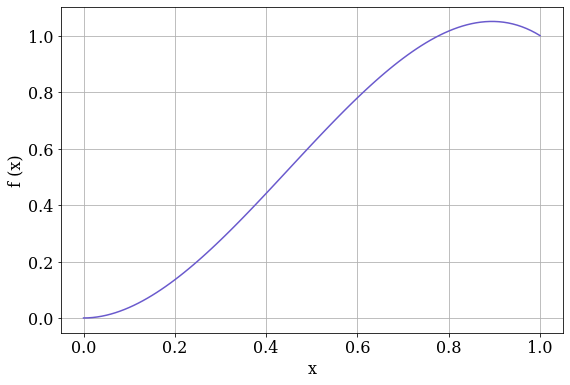

In [5]:
#On discrétise l'intervale de x comme ceci 
nx = 101  # nombre de point dans la direction x 
Lx = 1.0  # longueur du domaine dans la direction x 

x = np.linspace(0.0, Lx, num=nx)
fth= np.zeros(nx)

for i in range (nx) :
    fth[i]=f(x[i],cst[0],cst[1],cst[2],cst[3])

pyplot.figure(figsize=(9.0, 6.0))
pyplot.plot(x,fth,'slateblue')
pyplot.xlabel('x')
pyplot.ylabel('f (x)')
pyplot.grid()
pyplot.show()

**Gauss-Seidel**

Résolution de l'équation (1) avec la méthode Gauss-Seidel. 

On discrétise d'abord l'équation (1) : 
Pour cela on utilise des différences finies centrées d'ordre 2 et 4, on obtient:

$$
\begin{equation}
 0 = \frac{f_{i+2}-4f_{i+1}+6f_{i}-4f_{i-1}+f_{i-2}}{\Delta x^4} -5 \frac{f_{i+1}-2f_{i}+f_{i-1}}{\Delta x^2} + 4f_i 
\end{equation}
$$

La méthode de Gauss Seidel diffère de celle de Jacobi dans le sens où on utilise les valeurs mises à jour de la solution dés qu'elles sont disponibles. 

Si on imagine que on progresse une droite de longueur 1 discrétisée en nx point et que on se déplace dans le temps dessus de i=0 vers i = nx, alors on peut voir les valeurs mises à jour $f^{k+1}_{i-1}$ and $f^{k+1}_{i-2}$ peuvent être utilisées pour calculer $f^{k+1}_{i}$.

La formule d'itération pour Gauss-Seidel est alors:

$$
\begin{equation}
f^{k+1}_{i}= \frac{1}{B} (f^{k+1}_{i-2} + f^{k}_{i+2} + C(f^{k}_{i+1}+f^{k+1}_{i-1}))
\end{equation}
$$

en posant 

$$
\begin{align}
 B = -6 - 10\Delta x^2 - 4\Delta x^4 \\
 C= -4 - 5\Delta x^2
\end{align}
$$


On a maintenant besoin de prendre en compte les conditions au bords pour pouvoir définir les points $f_{i=1}$ et $f_{i=nx-2}$ sachant que : 

$f(0) = f_{i=0}$ = 0 et $f(x=1) = f_{i=nx-1} = 1$

(Remarque: on a compté les indices de $n=0$,correspondant à $x=0$ à $n=nx-1$ correspondant à $x=1$.)

En effectuant une différence fini arrière de $f(x)$ :

$$
\begin{equation}
\frac{f_{i} - f_{i-1}}{\Delta x} \approx f'(x)
\end{equation}
$$

on obtient que : 

$$
\begin{equation}
f'(0) \approx \frac{f_{0} - f_{-1}}{\Delta x} = 0
\end{equation}
$$

alors 

$$
\begin{equation}
f_{-1} = f_{0} = 0 
\end{equation}
$$


En effectuant une différence fini avant de $f(x)$ :

$$
\begin{equation}
\frac{f_{i+1} - f_{i}}{\Delta x} \approx f'(x)
\end{equation}
$$

$$
\begin{equation}
f'(1) \approx \frac{f_{nx} - f_{nx-1}}{\Delta x} = -1
\end{equation}
$$

alors 

$$
\begin{equation}
f_{nx} = -\Delta x + f_{nx-1} = -\Delta x + 1
\end{equation}
$$

On insère ces égalités dans les relations pour $f_{i=1}$ et $f_{i=-2}$ : 

$$
\begin{align}
f^{k+1}_{i=1}= \frac{1}{B} (f^{k}_{3} + C(f^{k}_{2})) \\
f^{k+1}_{i=nx-2}= \frac{1}{B} (f^{k+1}_{nx-4} + C(f^{k+1}_{nx-3})+C + 1-\Delta x)
\end{align}
$$

Et on fait converger les méthodes itératives jusqu'à ce que la différence en norme L2 de deux itérations successives soit $\leq 10^{-8}$.

In [6]:
#Différence en norme L2 entre f et fn. 
def L2_rel_erreur(f, fn):
    
    return np.sqrt(np.sum((f - fn)**2)/np.sum(fn**2))

In [7]:
@jit(nopython=True)
def gauss_seidel(f0, dx, maxiter=200000, rtol=1e-8):
    """
    Résoud l'équation (1) sur une grille 1D uniforme avec espacement dx 
    en utilisant la méthode de relaxation Gauss Seidel. 
    
    Le critère de sortie est basé sur la norme relative L2 atteignant une 
    différence entre deux itérations successives de 10^-8. 
    
    Paramètres
    ----------
    f0 : numpy.ndarray
        La solution initiale mise sous forme d'un vecteur 1D.
    dx : float
        Taille de l'intervalle entre deux points du vecteur x discrétisé.
    maxiter : integer, optionnel
        Nombre maximum d'itération à effectuer;
        par défault: 20000.
    rtol : float, optionnel
        Minimum de convergence à atteindre;
        par défault: 1e-8.
    
    Sortie
    -------
    f : numpy.ndarray
        La solution mise sous forme d'un vecteur 1D.
    ite : integer
        Le nombre d'itérations effectuée.
    diff : float
        La différence finale en norme L2 de deux itérations successives.
    """
    
    B= -6 - 10*dx**2 - 4*dx**4
    C= -4 - 5*dx**2
    nx = 101
    conv = [] 
    f = f0.copy()
    diff = rtol + 1.0  
    ite = 0  
    while diff > rtol and ite < maxiter:
        fn = f.copy() 
        # Mise à jour de la solution aux points intérieurs 
        for i in range (2,nx-2): 
            f[i] = 1/B * (f[i-2] + f[i+2] +
                                  C*(f[i+1] + f[i-1]))
        
    
        f[1] =  1/B * (C*(f[2]) + f[3])
        f[nx-2]= 1/B *(f[-4] + C*(f[-3]) + C + 1-dx)
    
        # Calcul de la différence en norme L2. 
        diff = np.sqrt(np.sum((f - fn)**2)/np.sum(fn**2))
        conv.append(diff)
        ite += 1

        
        
    return f, ite, conv

On utilise Numba (le nopython mode ici) pour pouvoir optimiser le temps de calcul. 

Remarque : l'appel de la fonction L2 dans la fonction Gauss Seidel créé une erreur avec Numba, je n'ai pas compris pourquoi mais en implémentant directement l'expression de la norme L2 de la différence dans la fonction cela compile (pourtant ma version de numba est récente : la 44.1). 


In [8]:
dx = Lx / (nx - 1)  # intervalle de discrétisation

x = np.linspace(0.0, Lx, num=nx)

# On définit une fonction initiale tel que f(0)=0 et f(1)=1
f0 = x


fgs, ites, conv_gs = gauss_seidel(f0,dx,maxiter=2000000, rtol=1e-8)

print('Gauss-Seidel : {} iterations '.format(ites) +
      'pour atteindre une différence en norme L2 de {}'.format(conv_gs[-1]))




Gauss-Seidel : 1680555 iterations pour atteindre une différence en norme L2 de 9.999989511429408e-09


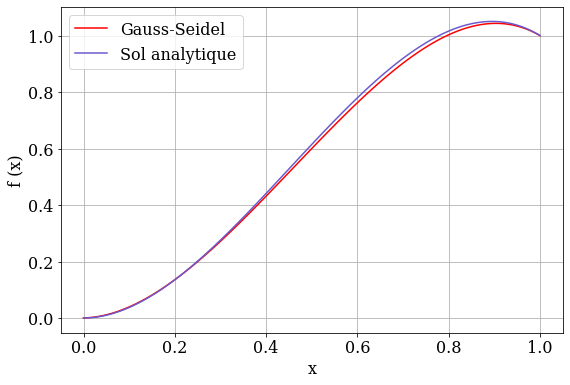

In [9]:
#On trace la fonction obtenue et on la compare avec la solution analytique. 

#On trace f(x)_numérique et f(x)_analytique.

pyplot.figure(figsize=(9.0, 6.0))
pyplot.plot(x,fgs,"red",label='Gauss-Seidel')
pyplot.plot(x,fth,'slateblue',label='Sol analytique')
pyplot.xlabel('x')
pyplot.ylabel('f (x)')
pyplot.grid()
pyplot.legend()
pyplot.show()



On peut s'intéresser à la façon dont la méthode Gaudd Seidel converge. 
On trace en échelle logarithmique la différence en norme L2 en fonction du nombre d'itération. 
La convergence du modèle est constante, de pente faible jusqu'à $10^{-8}$.  

Ici l'ordre de convergence est d'environ 0.64 au regard de la pente en échelle logaritmique.

Ce n'est pas l'algorithme le plus performant donc. 

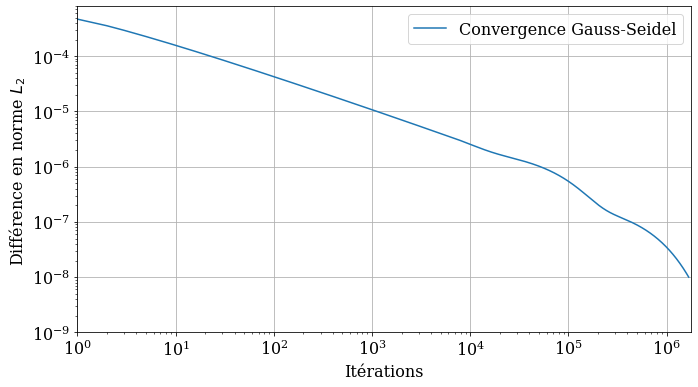

0.6248600861157045


In [10]:
ite=np.linspace(0,1680555,1680555) #itérations

pyplot.figure(figsize=(11.0, 6.0))
pyplot.loglog(ite,conv_gs,label='Convergence Gauss-Seidel')
pyplot.ylabel('Différence en norme $L_2$ ')
pyplot.xlabel('Itérations')
pyplot.grid()
pyplot.xlim(1, 1780000);
pyplot.ylim(1e-9, 0.8e-3);
pyplot.legend(loc="best")
pyplot.show()

#Calcul de la pente sur un intervalle de la droite.

slope, intercept = np.polyfit(np.log(ite[10: 100000]), np.log(conv_gs[10:100000]), 1)
print(-slope)

**Gradient conjugué**

Essayons une autre méthode, on résoud l'équation (1) avec la méthode du gradient conjugué.


La méthode du gradient conjugué résoud un système linéaire avec une matrice symmétrique et définie positive.

L'équation différentielle discrétisée correspond au système linéaire suivant : 

$$
\begin{equation}
A{\bf f}={\bf b},
\end{equation}
$$

où A est la matrice pour l'équation (1) discrétisée : 

$$
\begin{equation}
 \frac{d^4 f^k}{dx^4}-5 \frac{d^2 f^k}{dx^2}+ 4f^k = \frac{f^k_{i-2}-4f^k_{i-1}+6f^k_{i}-4f^k_{i+1}+f^k_{i+2}}{\Delta x^4} -5 \frac{f^k_{i-1}-2f^k_{i}+f^k_{i+1}}{\Delta x^2} + 4f^k_i 
\end{equation}
$$

en posant comme précdemment 
$$
\begin{align}
 B = -6 - 10\Delta x^2 - 4\Delta x^4 \\
 C= -4 - 5\Delta x^2
\end{align}
$$

on obtient 

$$
\begin{equation}
 A = \begin{pmatrix}
   1 & 0 & 0 & 0 & 0  & \cdots & \cdots  & 0 \\
   0 & -1 & \frac{C}{B} & \frac{1}{B} & 0  & \cdots & \cdots  & 0     \\
   \frac{1}{B} & \frac{C}{B} & -1 & \frac{C}{B} & \frac{1}{B} & 0 & \ddots  &  \vdots   \\
   0      & \frac{1}{B} & \frac{C}{B} & -1 & \frac{C}{B} & \frac{1}{B} &  \cdots &  0       \\
   \vdots & 0       &  \frac{1}{B} & \frac{C}{B} & -1 & \frac{C}{B} & \frac{1}{B} & 0  \\
   0      & \cdots  & \ddots & 0 & \frac{1}{B}  & \frac{C}{B} & -1 & 0    \\
   0      & \cdots & 0 & \cdots & 0 &  0 & 0 & 1     \\
    \end{pmatrix}
    .
    \begin{pmatrix}
     f_0 \\
     f_1 \\
      \vdots\\
     f_i \\
      \vdots\\
      \vdots\\
     f_{nx-2} \\
     f_{nx-1} \\
    \end{pmatrix}
    = \begin{pmatrix}
       0 \\
       0 \\
       \vdots\\
       \vdots\\
       0\\
        0 \\
     \frac{ -C-1+\Delta x}{B}\\
       1 \\
   \end{pmatrix}
\end{equation}
$$

où $f$ est défini tel que $f_{0} = 0$ et $f_{nx-1} = -1$.

$f_{1}$ et $f_{nx-2}$ sont calculées comme dans la méthode précédente : 

$$
\begin{align}
f_{i=1}= \frac{1}{B} (f_{3} + C(f_{2})) \\
f_{i=nx-2}= \frac{1}{B} (f_{nx-4} + C(f_{nx-3})+ C + 1-\Delta x)
\end{align}
$$


Chaque méthode itérative fonctionne avec une fonction initiale (guess) $\mathbf{f}^0$, qui se trouve modifiée de façon à approcher la solution. 
On peut voir cette méthode comme la modification d'un vecteur de valeur discrètes de $f$ sur la grille en additionnant un autre vecteur (faire un pas de taille $\alpha$ dans la direction $\mathbf{d}$) comme cela :

$$
\begin{equation}
{\bf f}^{k+1}={\bf f}^k + \alpha {\bf d}^k
\end{equation}
$$

Les itérations progressent vers la solution en faisant des pas le long des vecteurs de direction ${\bf d}^k $, le scalaire $\alpha$ dictant la taille d'un pas à faire à chaque itération. 
Pour converger rapidement vers la solution on choisis les vecteurs de direction et la taille des pas judicieusement.
L'outils qu'on utilise pour trouver la bonne direction à suivre est appelé le * résiduel *.

Le résiduel se calcul comme tel : 
$$
\begin{equation}
{\bf r}^k={\bf b}-A{\bf f}^k
\end{equation}
$$

À l'itération $0$, on fait une supposition initiale, on aura:

$$
\begin{equation}
{\bf b}-A{\bf f}^0={\bf r}^0\ne {\bf 0}
\end{equation}
$$

Le vecteur $ {\bf r} ^ 0 $ est le résidu initial et mesure à quelle point nous sommes loin de satisfaire le système linéaire. A chaque itération il devient de plus en plus petit:

$$
\begin{equation}
{\bf r}^k={\bf b}-A{\bf f}^k
\end{equation}
$$

Pour réduire le nombre de sauts en s'assurant que l'algorithme ne sélectionne jamais deux fois la même direction. La taille des pas est désormais donnée par:

$$
\begin{equation}
\alpha = \frac{{\bf r}^k \cdot {\bf r}^k}{A{\bf d}^k \cdot {\bf d}^k}
\end{equation}
$$

et le vecteur de direction par : 

$$
\begin{equation}
{\bf d}^{k+1}={\bf r}^{k+1}+\beta{\bf d}^{k}
\end{equation}
$$

où $\beta = \frac{{\bf r}^{k+1} \cdot {\bf r}^{k+1}}{{\bf r}^k \cdot {\bf r}^k}$.

L'algorithme prend donc la forme suivante : 

On calcule ${\bf d}^0 = {\bf r}^0$ une fois, puis dans la boucle d'itération : 

1. On calcule $\alpha = \frac{{\bf r}^k \cdot {\bf r}^k}{A{\bf d}^k \cdot {\bf d}^k}$
2. On met à jour ${\bf f}^{k+1}$
3. Calcul de ${\bf r}^{k+1} = {\bf r}^k - \alpha A {\bf d}^k$
4. Calcul de $\beta = \frac{{\bf r}^{k+1} \cdot {\bf r}^{k+1}}{{\bf r}^k \cdot {\bf r}^k}$
5. Calcul de ${\bf d}^{k+1}={\bf r}^{k+1}+\beta{\bf d}^{k}$

Et on fait converger les méthodes itératives jusqu'à ce que la différence en norme L2 de deux itérations successives soit $\leq 10^{-8}$.

In [11]:
def gradient_conjugue(f0, b, dx, maxiter=20000, rtol=1e-8):
    """
    Résoud l'équation (1) sur une grille 1D uniforme avec espacement dx 
    en utilisant la méthode du gradient conjugué. 
    
    Paramètres
    ----------
    p0 : numpy.ndarray
        La solution initiale mise sous forme d'un vecteur 1D.
    b : numpy.ndarray
        ici = 0 
    dx : float
        Taille de l'intervalle entre deux points du vecteur x discrétisé.
    maxiter : integer, optionnel
        Nombre maximum d'itération à effectuer;
        par défault: 20000.
    rtol : float, optionnel
        Minimum de convergence à atteindre;
        par défault: 1e-8.

    Sortie
    -------
    f : numpy.ndarray
        La solution mise sous forme d'un vecteur 1D.
    ite : integer
        Le nombre d'itérations effectuée.
    conv : list
        Liste des différences en norme L2 de chaque boucle.
    """
    
    B= -6 - 10*dx**2 - 4*dx**4
    C= -4 - 5*dx**2

    def A(p):        
        
        Ap=np.zeros(len(p))
        
        Ap[2:-2]= 1/B*(p[:-4] + p[4:] +
                                  C*(p[1:-3] + p[3:-1])) - p[2:-2]
        
        Ap[1] = 1/B * ( C*(p[2]) + (p[3])) - p[1]
        Ap[-2] = 1/B *(p[-4] + C*(p[-3])) - p[nx-2]
        
        
        return Ap[1:-1]   

    
    f = f0.copy()
    r = np.zeros_like(f)  # résidu initial
    Ad = np.zeros_like(f) 
    conv = []  
    diff = rtol + 1  
    ite = 0  # index d'itération
    r[1:-1] = b[1:-1] - A(f)
    d = r.copy() #d_o=r_0  
    
    while diff > rtol and ite < maxiter:
        fk = f.copy()
        rk = r.copy()
        Ad[1:-1] = A(d)
        # Calcul de la taille du pas.
        alpha = np.sum(r * r) / np.sum(d * Ad)
        # Mise à jour de la solution.
        f = fk + alpha * d
        # Mise à jour du résidu.
        r = rk - alpha * Ad
        # Mise à jour du vecteur de direction.
        beta = np.sum(r * r) / np.sum(rk * rk)
        d = r + beta * d
        # Calcul de la différence en norme L2. 
        diff = L2_rel_erreur(f, fk)
        conv.append(diff)
        ite += 1
        
    return f, ite, conv

In [12]:
nx = 101  
Lx = 1.0  
dx = Lx / (nx - 1)  # intervalle de discrétisation


# On définit une fonction initiale tel que f(0)=0 et f(1)=1
x = np.linspace(0.0, Lx, num=nx)
f0 = x

B= -6 - 10*dx**2 - 4*dx**4
C= -4 - 5*dx**2

# On définit b 
b=np.zeros(nx)
b[-1]= 1
b[-2]= (-C-1+dx)/B

# Calcul de f

fgc, ites, conv_cg = gradient_conjugue(f0, b, dx, maxiter=20000, rtol=1e-8)

print('Méthode du gradient conjugué: {} itérations '.format(ites) +
      'pour atteindre une différence en norme L2 de {}'.format(conv_cg[-1]))

Méthode du gradient conjugué: 278 itérations pour atteindre une différence en norme L2 de 3.372553397249847e-09


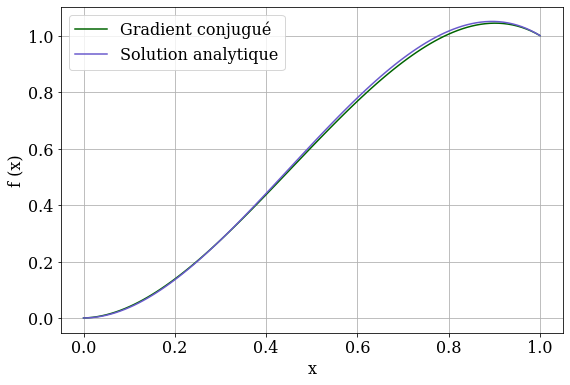

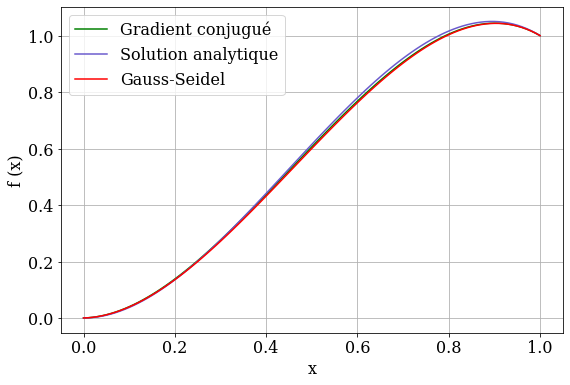

In [13]:
#On trace la fonction obtenue et on la compare avec la solution analytique. 

pyplot.figure(figsize=(9.0, 6.0))
pyplot.plot(x,fgc,"darkgreen",label='Gradient conjugué')
pyplot.plot(x,fth,"slateblue",label='Solution analytique' )
pyplot.xlabel('x')
pyplot.ylabel('f (x)')
pyplot.grid()
pyplot.legend()
pyplot.show()

pyplot.figure(figsize=(9.0, 6.0))
pyplot.plot(x,fgc,"green",label='Gradient conjugué')
pyplot.plot(x,fth,'slateblue' ,label='Solution analytique' )
pyplot.plot(x,fgs,"red",label='Gauss-Seidel')
pyplot.xlabel('x')
pyplot.ylabel('f (x)')
pyplot.grid()
pyplot.legend()
pyplot.show()

On montre la différence en norme L2 entre la fonction calculée analytiquement ( $f_{th}$ ) et la fonction obtenue de manière numérique avec la méthode Gauss Seidel ( $f_{gs}$ ) et du gradient conjugué ( $f_{gc}$ ).

On voit que, pour Gauss-Seidel, l'erreur est très faible pour $x\in [0.2;1]$ et est maximale (bien que $\leq$ 0.5) pour $x\in [0;0.2]$. 
De même pour la méthode du gradient conjugué où l'erreur est très faible pour $x\in [0.3;1]$ et est maximale (bien que $\leq$ 0.5) pour $x\in [0;0.3]$.

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


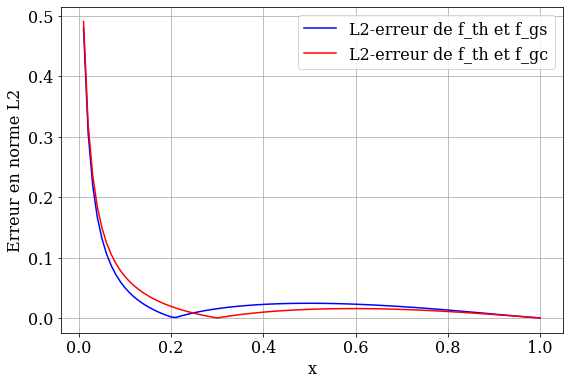

In [19]:
#On compare le résultat théorique et le résultat numérique avec les deux méthodes . 

import pylab as pl

erreur= np.zeros(nx)
erreur2= np.zeros(nx)

for i in range (nx) :
    erreur[i]= L2_rel_erreur(fth[i],fgs[i])
for i in range (nx) :
    erreur2[i]= L2_rel_erreur(fth[i],fgc[i])
    
pl.figure(figsize=(9.0, 6.0))
pl.plot(x,erreur,"blue",label='L2-erreur de f_th et f_gs')
pl.plot(x,erreur2,"red",label='L2-erreur de f_th et f_gc')
pl.xlabel('x')
pl.ylabel('Erreur en norme L2')
pl.grid()
pl.legend()
pl.show()

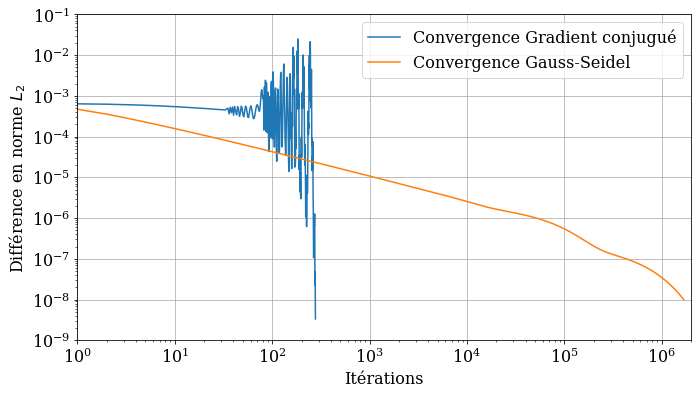

In [111]:
#Etude comparé de la convergence 

itec=np.linspace(0,278,278) 
iteg=np.linspace(0,1680555,1680555) 

pyplot.figure(figsize=(11.0, 6.0))
pyplot.loglog(itec,conv_cg,label='Convergence Gradient conjugué')
pyplot.loglog(iteg,conv_gs,label='Convergence Gauss-Seidel')
pyplot.ylabel('Différence en norme $L_2$ ')
pyplot.xlabel('Itérations')
pyplot.grid()
pyplot.xlim(1, 2000000);
pyplot.ylim(1e-9,1e-1,);
pyplot.legend(loc="best")
pyplot.show()

Ici on remarque que, dans les 50 premières itérations la méthode du gradient conjugué converge peu, puis la différence en norme L2 entre deux itérations successives oscille pour finir par se stabiliser et atteindre $10^{-9}$. 